# Normal equation using regurisation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [36]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [56]:
x = df[['lotsize','bedrooms','bathrms', 'stories','garagepl'] ]
y = df['price']

In [57]:
print(x.shape, y.shape)

(546, 5) (546,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))

In [58]:
lamda = np.array([1000,1000,1000,1000,1000])

In [59]:
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lamda),np.dot(x.T,y))

In [60]:
w

array([    8.9744776 ,  5850.96932779, -2730.68589004,  5071.93835854,
       -4378.58340488])

In [61]:
h = np.dot(x,w)
h.shape

(546,)

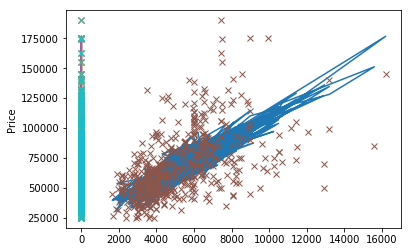

Note: If x consists of more than one feature, the plot would not make any sense.
Reason: The n-dimentions (n features) would be displayed in 2 dimentions.


In [62]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()
print("Note: If x consists of more than one feature, the plot would not make any sense.")
print("Reason: The n-dimentions (n features) would be displayed in 2 dimentions.")

In [63]:
score = np.sum((np.abs(np.divide((h-y),y))))/h.size
print("Score using naive Linear Regression: " + str(score))

Score using naive Linear Regression: 0.2456416359766596


In [64]:
try:
    test = np.array([4500, 3, 2, 2, 2])
    val = np.dot(test,w)
    print("%8s | %8s | %9s | %8s | %8s" % ("Lotsize", "Bedrooms", "Bathrooms", "Stories", "Garage"))
    print("%8d | %8d | %9d | %8d | %8d" % (test[0],test[1],test[2],test[3],test[4]))
    print("The predicted value for: " + str(val))
except Exception as e:
    print("Give correct number of inputs to predict")
    print(e)

 Lotsize | Bedrooms | Bathrooms |  Stories |   Garage
    4500 |        3 |         2 |        2 |        2
The predicted value for: 53863.39529615549


# Gradient Descent using Regularisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [3]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')


In [5]:
df.head()
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']] 
y = df['price']

In [6]:
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))

In [7]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (382, 5)
y.shape: (382, 1)
m: 382
n: 5
x.shape after appending a column for bias: (382, 6)


In [9]:

print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))


x.shape: (382, 6)
y.shape: (382, 1)


In [10]:

epsilon = 0.0000001
alpha = 0.001 # Learning rate
log1 = np.array([])
log2 = np.array([])
log3 = np.array([])
while(alpha<1):
    lamda = 1
    while(lamda < 1001):
        iterations = 0
        w = np.zeros((n+1,1))
        temp = np.zeros((n+1,1))
        J_prev=0
        J=100
        while(abs(J_prev-J)>epsilon):
            h = np.dot(x,w)
            for i in range(1):
                temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0) )
            for i in range(2):
                temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0) + lamda*w[i,:])
            for i in range(n+1):
                w[i,:] = temp[i]
            J_prev = J
            J = (1/(2*m))*(np.sum(np.square(h-y)) + lamda*np.sum(np.multiply(w,w)))

            if(alpha == 0.001 and lamda == 10):
                log1 = np.append(log1, J)
            if(alpha == 0.001 and lamda == 100):
                log2 = np.append(log2, J)
            if(alpha == 0.001 and lamda == 1000):
                log3 = np.append(log3, J)
            iterations+=1
        if(alpha == 0.001 and lamda==10):
            w1 = w 
            t1 = iterations
        if(alpha == 0.001 and lamda==100):
            w2 = w 
            t2 = iterations
        if(alpha == 0.001 and lamda == 1000):
            w3 = w 
            t3 = iterations
        
        print("alpha = ",alpha,"lamda = ",lamda," iterations = ",iterations," cost = ",J)
        lamda = lamda*10
    print("______________")
    alpha = alpha*10

alpha =  0.001 lamda =  1  iterations =  4042  cost =  0.36246910356956635
alpha =  0.001 lamda =  10  iterations =  3947  cost =  0.36577903703088016
alpha =  0.001 lamda =  100  iterations =  3199  cost =  0.3919852017200696
alpha =  0.001 lamda =  1000  iterations =  1120  cost =  0.465508039001582
______________
alpha =  0.01 lamda =  1  iterations =  523  cost =  0.36242275465938245
alpha =  0.01 lamda =  10  iterations =  512  cost =  0.36573396834743604
alpha =  0.01 lamda =  100  iterations =  429  cost =  0.3919496662076777
alpha =  0.01 lamda =  1000  iterations =  184  cost =  0.46549496865103324
______________
alpha =  0.1 lamda =  1  iterations =  64  cost =  0.3624181732922636
alpha =  0.1 lamda =  10  iterations =  68  cost =  0.3657295304969834
alpha =  0.1 lamda =  100  iterations =  70  cost =  0.39194493403965236
alpha =  0.1 lamda =  1000  iterations =  28  cost =  0.46549256458629856
______________


# Plots for alpha = 0.001

Hypothesis when lamda = 10

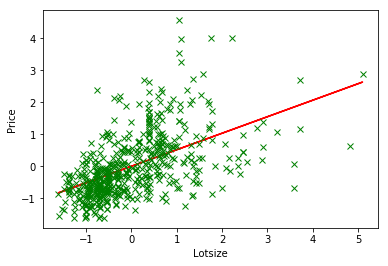

In [104]:

w = w1
h = np.dot(x,w)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize') #hypothesis is plotted only with respect to Lotsize
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

Hypothesis when lamda = 100

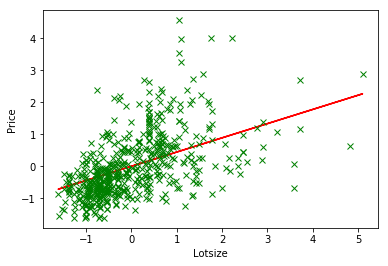

In [105]:

w = w2
h = np.dot(x,w)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

Hypothesis when lamda = 1000

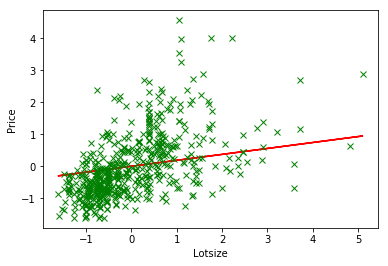

In [106]:

w = w3
h = np.dot(x,w)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

Cost vs Iteration plot when lamda = 10

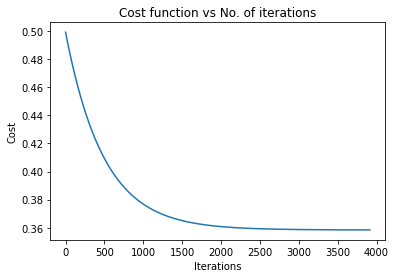

In [107]:

log = log1
it = np.arange(t1)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

Cost vs Iteration plot when lamda = 100

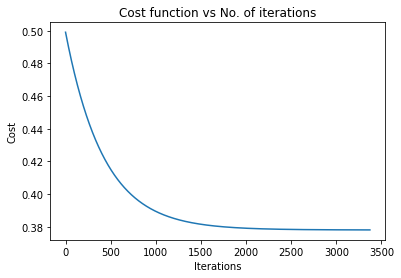

In [108]:

log = log2
it = np.arange(t2)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

Cost vs Iteration plot when lamda = 1000

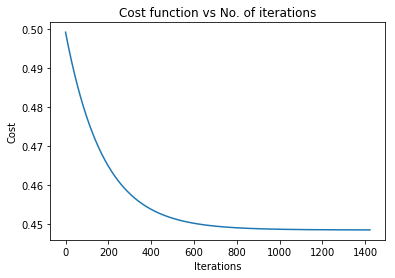

In [109]:

log = log3
it = np.arange(t3)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()